<a href="https://colab.research.google.com/github/AnkitaSK/AB-Image-Classification/blob/main/mainCIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.backend import clear_session

clear_session()

Data Preprocessing



In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# separating training and validation set
X_valid = X_train[:10000]
X_train = X_train[10000:]

y_valid = y_train[:10000]
y_train = y_train[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
y_train

array([[1],
       [6],
       [6],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

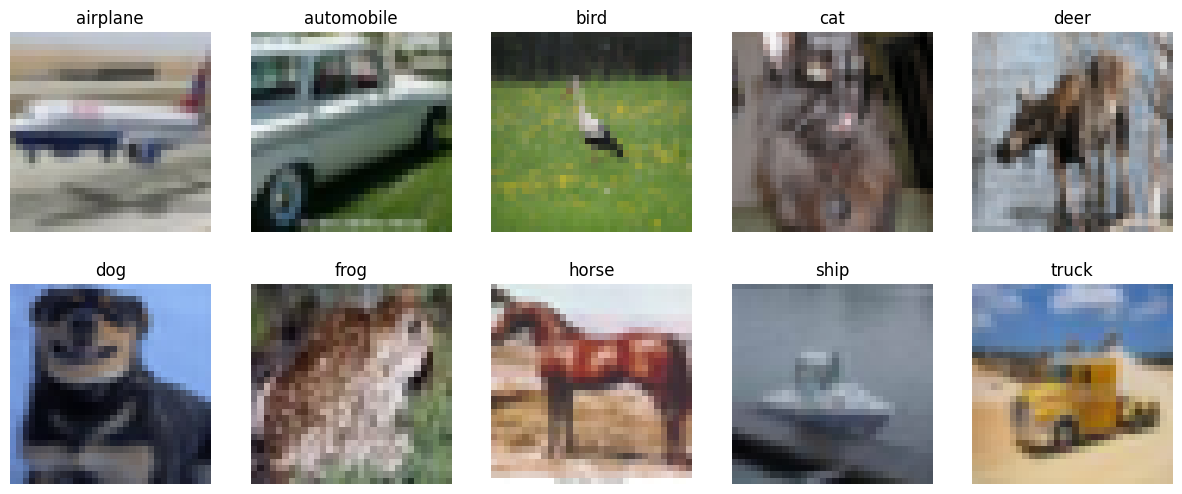

In [6]:
# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
# Create a 10x10 grid of plots to display the images and their labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# Flatten the axes into a 1D array
axes = axes.flatten()

# Set random seed for reproducibility
np.random.seed(42)

# Loop through each class and select 10 random samples
for class_index in range(10):
    class_samples = np.where(y_train == class_index)[0]
    random_sample = np.random.choice(class_samples, 1, replace=False)
    sample_index = random_sample[0]
    ax = axes[class_index]
    ax.imshow(X_train[sample_index])
    ax.set_title(class_names[class_index])
    ax.axis("off")


plt.show()

Data Normalization and Agumentation


In [7]:
# normalize the data by dividing by 255 to scale the pixel values between 0 and 1

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
X_valid = X_valid.astype("float32") / 255

print("shape of x train normalized", X_train.shape)
print("shape of x test normalized", X_test.shape)
print("shape of x train validation", X_valid.shape)

shape of x train normalized (40000, 32, 32, 3)
shape of x test normalized (10000, 32, 32, 3)
shape of x train validation (10000, 32, 32, 3)


In [8]:
from tensorflow.keras.utils import to_categorical

# Change the labels from integer to categorical data.
print("Original (integer) label for the first training sample: ", y_train[0])

# Convert the labels to one-hot encoded form.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

print("After conversion to categorical one-hot encoded labels: ", y_train[0])

Original (integer) label for the first training sample:  [1]
After conversion to categorical one-hot encoded labels:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Data augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,  # Random rotation by 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    horizontal_flip=True,  # Randomly flip images horizontally
    zoom_range=0.1,  # Random zoom by 10%
)

# Fit the data generator to the training data
datagen.fit(X_train)

Model Architecture

In [10]:
from tensorflow.keras import layers

In [11]:
# design CNN suitable for image classification
# Include convolutional layers, pooling layers, and fully connected layers.
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define model
model = Sequential(
    [
        # conv block 1: 32 filters, Maxpool
        layers.Conv2D(
            32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)
        ),
        layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # conv block 2: 32 filters, Maxpool
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        # conv block 3: 32 filters, Maxpool
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# model = cnn_model()
model.build()

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile the model
# we use categorical_crossentropy since our labels are one-hot encoded
model.compile(
    optimizer="adam",  #'adam',#'rmsprop',
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [15]:
from dataclasses import dataclass


@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 50
    BATCH_SIZE: int = 256

In [16]:
# train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid),
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.2844 - loss: 1.9372 - val_accuracy: 0.4867 - val_loss: 1.4251
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5121 - loss: 1.3417 - val_accuracy: 0.5082 - val_loss: 1.3994
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6013 - loss: 1.1229 - val_accuracy: 0.6422 - val_loss: 0.9894
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6724 - loss: 0.9224 - val_accuracy: 0.6780 - val_loss: 0.9084
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7126 - loss: 0.8212 - val_accuracy: 0.6904 - val_loss: 0.8690
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7421 - loss: 0.7297 - val_accuracy: 0.7272 - val_loss: 0.7913
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7795 - loss: 0.6277 - val_accuracy: 0.7283 - val_loss: 0.7943
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8050 - loss: 0.5572 - val_accuracy: 

In [17]:
def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [
            metrics,
        ]
        metric_name = [
            metric_name,
        ]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

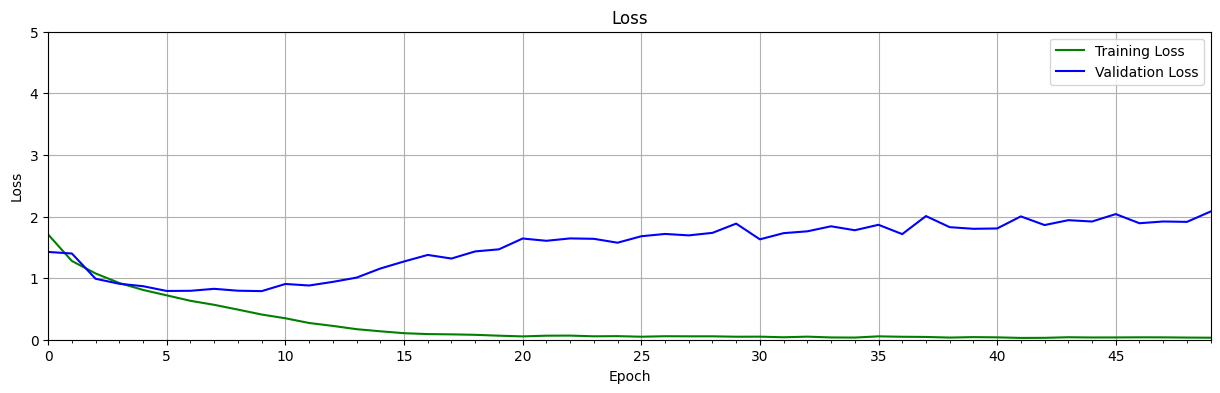

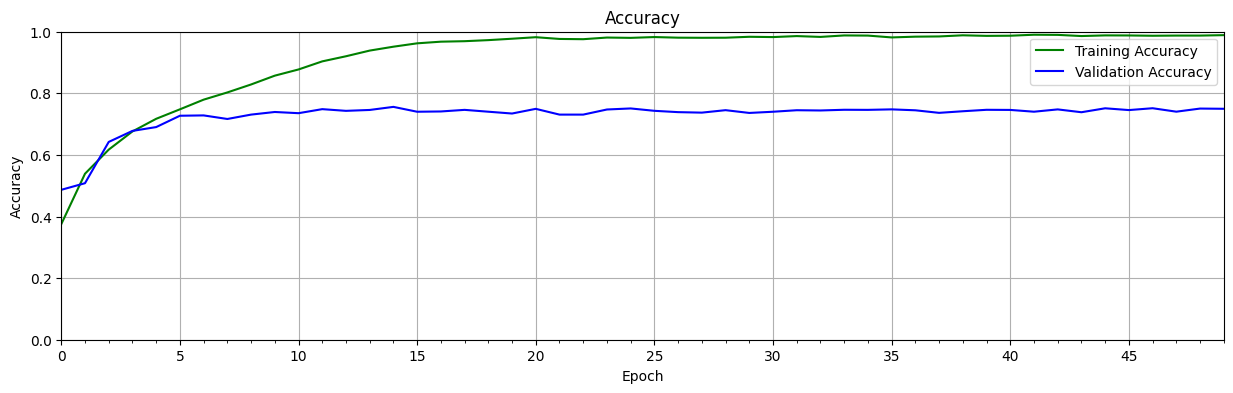

In [18]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


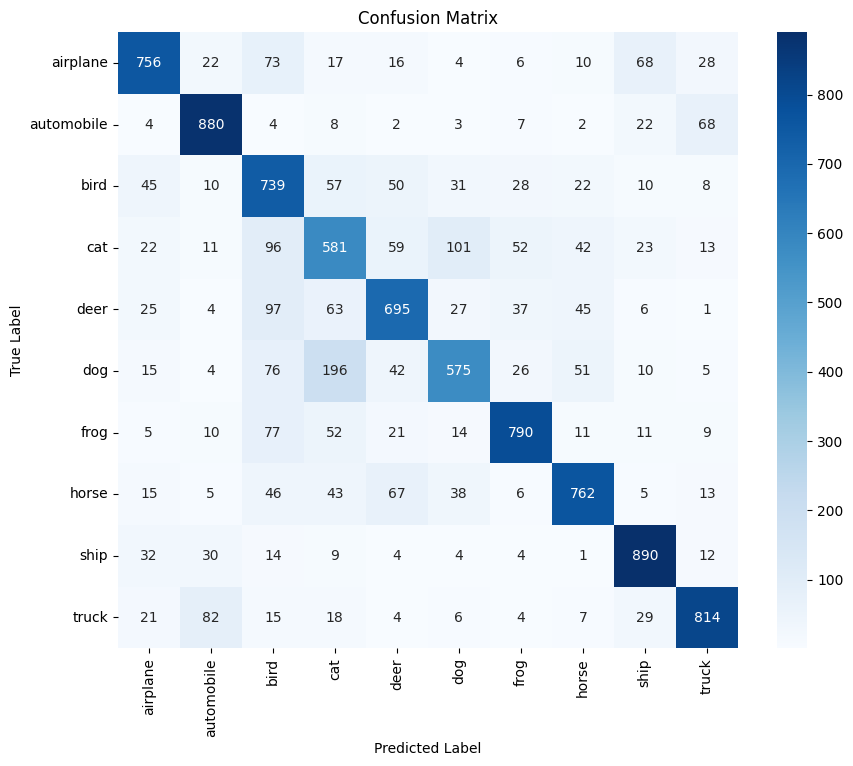

In [19]:
# confusion matrix
y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=1)
gt = np.argmax(y_test, axis=1)
cm = confusion_matrix(gt, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid)

test_loss, test_accuracy = model.evaluate(X_test, y_test)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0174
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 2.0557
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7482 - loss: 2.1862


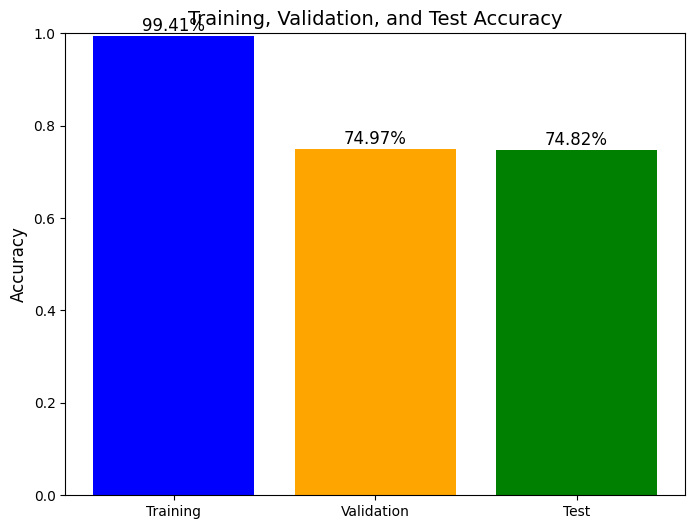

In [25]:
import matplotlib.pyplot as plt

# Labels for the bar chart
labels = ["Training", "Validation", "Test"]
# Accuracy values
accuracies = [train_accuracy, valid_accuracy, test_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=["blue", "orange", "green"])

# Add title and labels
plt.title("Training, Validation, and Test Accuracy", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim([0, 1])  # Set y-axis from 0 to 1 (for percentages)

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2%}", ha="center", fontsize=12)

# Show the plot
plt.show()

In [26]:
from sklearn.metrics import classification_report, accuracy_score

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Model test accuracy: {test_accuracy*100.:.3f}, Model test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7482 - loss: 2.1862
Model test accuracy: 74.820, Model test loss: 2.1674652099609375


In [27]:
# adding Dropout to the model
from tensorflow.keras import layers

# define model
model_dropout = Sequential(
    [
        # conv block 1: 32 filters, Maxpool
        layers.Conv2D(
            32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)
        ),
        layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        # conv block 2: 32 filters, Maxpool
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        # conv block 3: 32 filters, Maxpool
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model_dropout.build()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# define model checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath="best_model.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    verbose=1,
)

In [29]:
# create the model
model_dropout.summary()

# compile dropout mode
model_dropout.compile(
    optimizer="adam",  #'sgd',#'adam',#'rmsprop',
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# train dropout model
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    batch_size=TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint],
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2200 - loss: 2.0696
Epoch 1: val_loss improved from inf to 1.50484, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.2205 - loss: 2.0683 - val_accuracy: 0.4456 - val_loss: 1.5048
Epoch 2/50
147/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4273 - loss: 1.5403
Epoch 2: val_loss improved from 1.50484 to 1.27337, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4295 - loss: 1.5354 - val_accuracy: 0.5379 - val_loss: 1.2734
Epoch 3/50
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5320 - loss: 1.2972
Epoch 3: val_loss improved from 1.27337 to 1.10042, saving model to best_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5325 - loss: 1.2958 - val_accuracy: 0.6013 - val_loss: 1.1004
Epoch 4/50
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5883 - loss: 1.1419
Epoch 4: val_loss improved from 1.10042 to 1.03684,

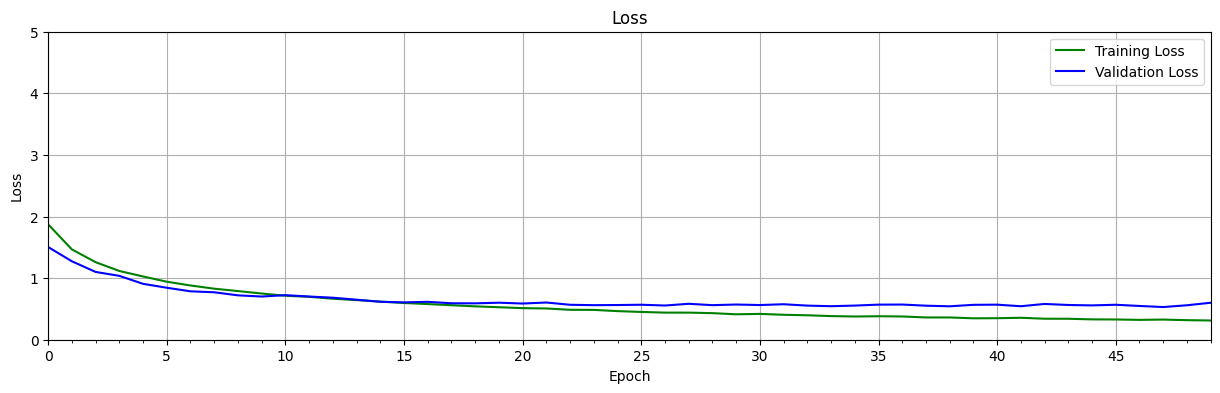

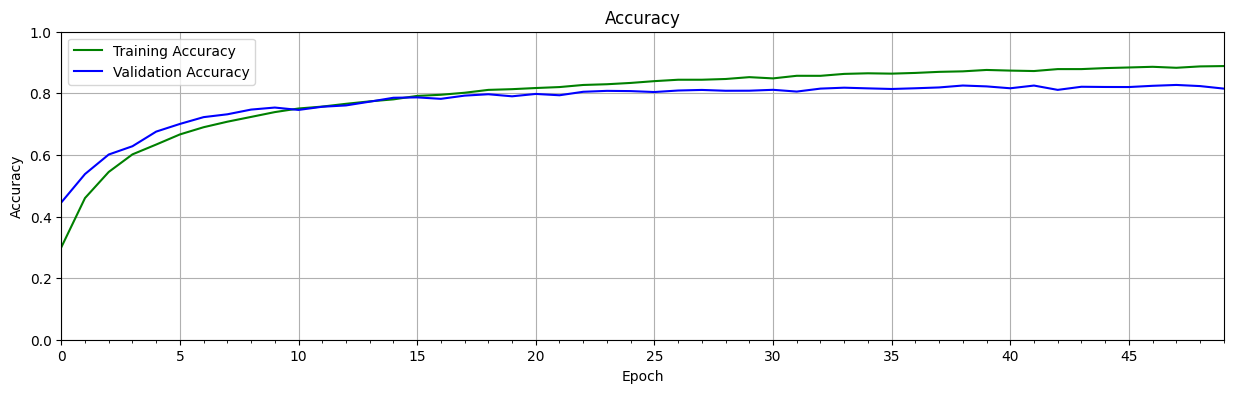

In [30]:
# Retrieve training results.
train_loss = history_dropout.history["loss"]
train_acc = history_dropout.history["accuracy"]
valid_loss = history_dropout.history["val_loss"]
valid_acc = history_dropout.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


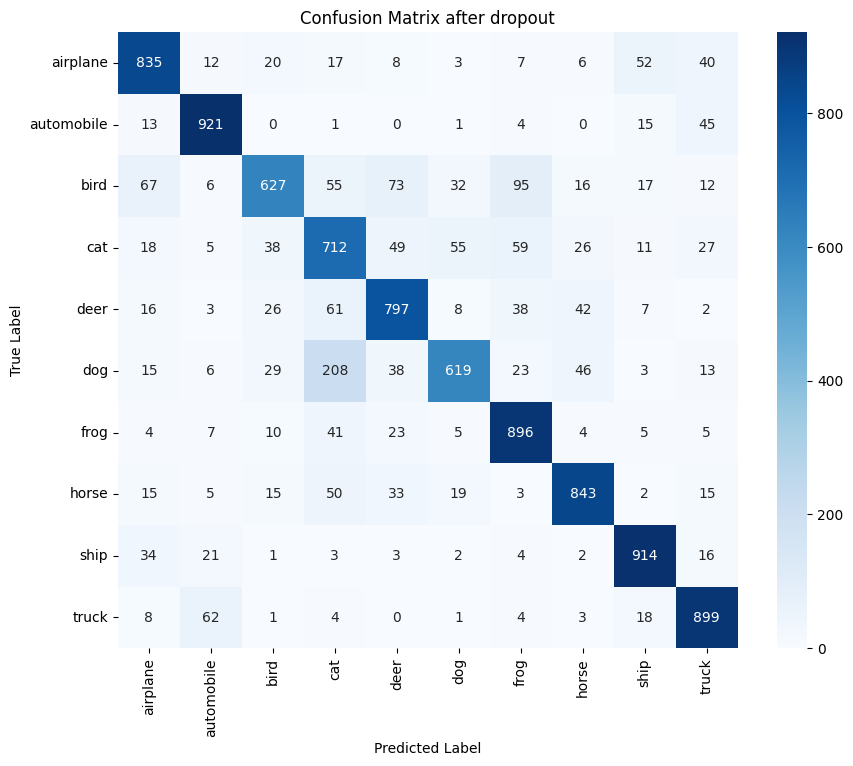

In [31]:
# confusion matrix
y_pred_dropout = model_dropout.predict(X_test)

predictions = np.argmax(y_pred_dropout, axis=1)
gt_dropout = np.argmax(y_test, axis=1)
cm_dropout = confusion_matrix(gt_dropout, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_dropout,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("Confusion Matrix after dropout")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [32]:
test_loss, test_accuracy = model_dropout.evaluate(X_test, y_test)
print(f"Model test accuracy: {test_accuracy*100.:.3f}, Model test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.6288
Model test accuracy: 80.630, Model test loss: 0.6291138529777527


In [33]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0174
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 2.0557


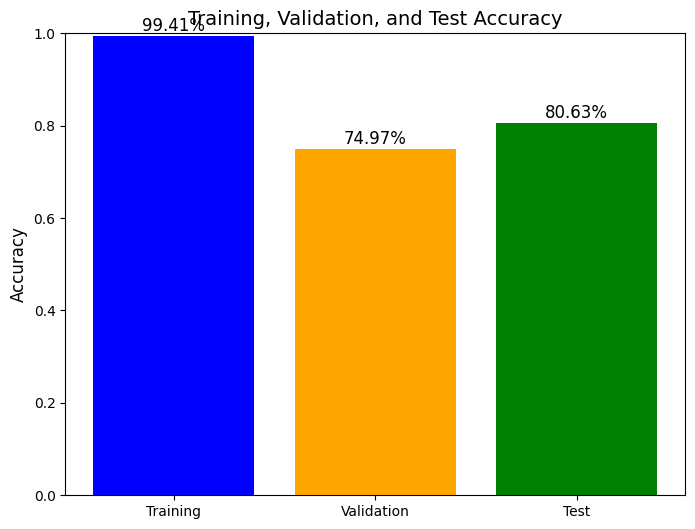

In [34]:
import matplotlib.pyplot as plt

# Labels for the bar chart
labels = ["Training", "Validation", "Test"]
# Accuracy values
accuracies = [train_accuracy, valid_accuracy, test_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=["blue", "orange", "green"])

# Add title and labels
plt.title("Training, Validation, and Test Accuracy", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim([0, 1])  # Set y-axis from 0 to 1 (for percentages)

# Add accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2%}", ha="center", fontsize=12)

# Show the plot
plt.show()